In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np 
import seaborn as sns

/root/anaconda3/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
/root/anaconda3/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
/root/anaconda3/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
/root/anaconda3/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [2]:
df = pd.read_csv("india_trade/2018-2010_export.csv")

In [3]:
df.head()

,HSCode,Commodity,value,country,year
0,2,MEAT AND EDIBLE MEAT OFFAL.,0.18,AFGHANISTAN TIS,2018
1,3,"FISH AND CRUSTACEANS, MOLLUSCS AND OTHER AQUAT...",0.00,AFGHANISTAN TIS,2018
2,4,DAIRY PRODUCE; BIRDS' EGGS; NATURAL HONEY; EDI...,12.48,AFGHANISTAN TIS,2018
3,6,LIVE TREES AND OTHER PLANTS; BULBS; ROOTS AND ...,0.00,AFGHANISTAN TIS,2018
4,7,EDIBLE VEGETABLES AND CERTAIN ROOTS AND TUBERS.,1.89,AFGHANISTAN TIS,2018


In [4]:
df.isna().sum()

HSCode           0
Commodity        0
value        14038
country          0
year             0
dtype: int64

In [5]:
df.dropna(inplace=True)

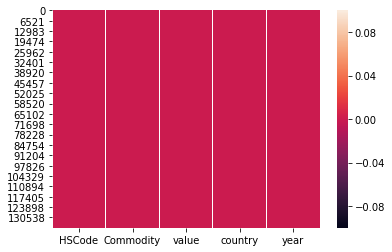

In [6]:
sns.heatmap(df.isna())

In [10]:
df.describe()

,HSCode,value,year
count,122985.000000,122985.000000,122985.000000
mean,51.288669,21.567829,2014.065366
std,27.814548,229.701279,2.581142
min,1.000000,0.000000,2010.000000
25%,28.000000,0.030000,2012.000000
50%,52.000000,0.360000,2014.000000
75%,74.000000,3.770000,2016.000000
max,99.000000,19805.170000,2018.000000


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 122985 entries, 0 to 137022
Data columns (total 5 columns):
HSCode       122985 non-null int64
Commodity    122985 non-null object
value        122985 non-null float64
country      122985 non-null object
year         122985 non-null int64
dtypes: float64(1), int64(2), object(2)
memory usage: 5.6+ MB


In [17]:
df.nunique()

HSCode          98
Commodity       98
value        10687
country        248
year             9
dtype: int64

# Year wise Analysis

In [21]:
df_year = df.groupby("year").agg({"value":"sum"})

In [22]:
df_year["Growth Range"] = df_year.pct_change()

In [24]:
df_year.reset_index(inplace=True)

In [25]:
df_year

,year,value,Growth Range
0,2010,249801.18,NaN
1,2011,305948.28,0.224767
2,2012,300384.32,-0.018186
3,2013,314388.61,0.046621
4,2014,310321.02,-0.012938
5,2015,262274.30,-0.154829
6,2016,275835.27,0.051705
7,2017,303507.85,0.100323
8,2018,330058.64,0.087480


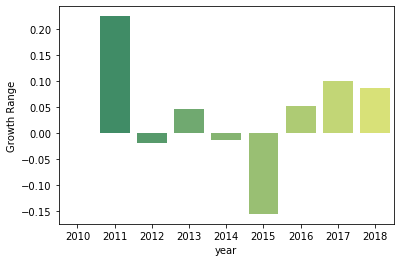

In [31]:
plt.figure()
sns.barplot(x="year" , y="Growth Range" , data=df_year , palette="summer")
plt.show()

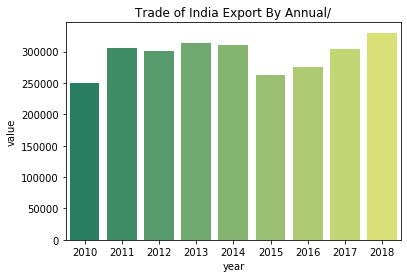

In [36]:
plt.title("Trade of India Export By Annual/")
sns.barplot(x="year" , y="value" , data=df_year , palette="summer")

In [32]:
df_year.describe()

,year,value,Growth Range
count,9.000000,9.000000,8.000000
mean,2014.000000,294724.385556,0.040618
std,2.738613,26318.974416,0.109777
min,2010.000000,249801.180000,-0.154829
25%,2012.000000,275835.270000,-0.014250
50%,2014.000000,303507.850000,0.049163
75%,2016.000000,310321.020000,0.090691
max,2018.000000,330058.640000,0.224767


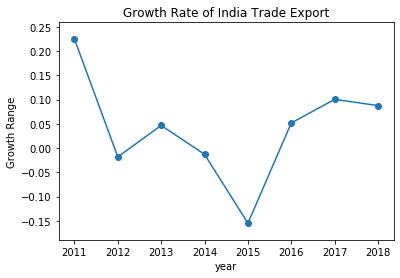

In [34]:
plt.title("Growth Rate of India Trade Export")
plt.scatter(x=df_year.year , y=df_year["Growth Range"])
sns.lineplot(x=df_year.year , y=df_year["Growth Range"])

# Commodity Wise Analysis

In [38]:
df.Commodity.nunique()

98

In [42]:
df.Commodity.value_counts()

NUCLEAR REACTORS, BOILERS, MACHINERY AND MECHANICAL APPLIANCES; PARTS THEREOF.                                                                            1882
ELECTRICAL MACHINERY AND EQUIPMENT AND PARTS THEREOF; SOUND RECORDERS AND REPRODUCERS, TELEVISION IMAGE AND SOUND RECORDERS AND REPRODUCERS,AND PARTS.    1878
PHARMACEUTICAL PRODUCTS                                                                                                                                   1876
OPTICAL, PHOTOGRAPHIC CINEMATOGRAPHIC MEASURING, CHECKING PRECISION, MEDICAL OR SURGICAL INST. AND APPARATUS PARTS AND ACCESSORIES THEREOF;               1849
ARTICLES OF APPAREL AND CLOTHING ACCESSORIES, NOT KNITTED OR CROCHETED.                                                                                   1817
PLASTIC AND ARTICLES THEREOF.                                                                                                                             1809
ARTICLES OF IRON OR STEEL                     

In [43]:
df_comm = df.groupby("Commodity").agg({"value":"sum"})

In [47]:
df_comm.reset_index(inplace=True)

In [52]:
df_comm = df_comm[:15]

In [48]:
df_comm.head()

,Commodity,value
0,"AIRCRAFT, SPACECRAFT, AND PARTS THEREOF.",28219.85
1,ALBUMINOIDAL SUBSTANCES; MODIFIED STARCHES; GL...,2384.15
2,ALUMINIUM AND ARTICLES THEREOF.,25407.12
3,ANIMAL OR VEGETABLE FATS AND OILS AND THEIR CL...,8774.07
4,ARMS AND AMMUNITION; PARTS AND ACCESSORIES THE...,656.08


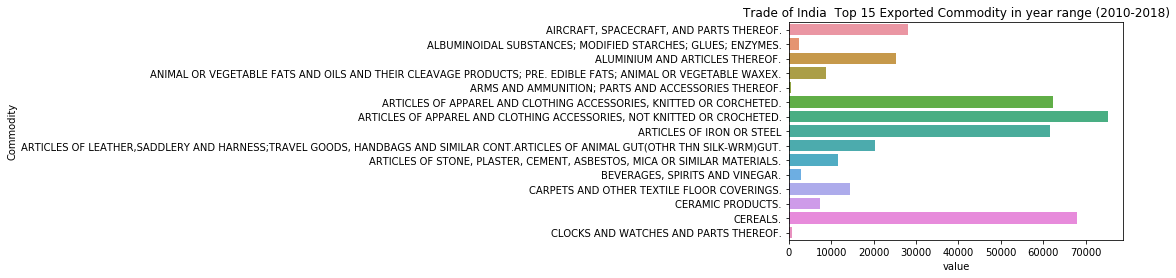

In [55]:
plt.title("Trade of India  Top 15 Exported Commodity in year range (2010-2018)")
sns.barplot(y=df_comm["Commodity"] , x=df_comm["value"] , orient="h")

In [57]:
df_comm =pd.pivot_table(df , values="value" , index="Commodity" , columns="year")

In [69]:
df_comm.sample(n=4)

year,2010,2011,2012,2013,2014,2015,2016,2017,2018
Commodity,,,,,,,,,
EXPLOSIVES; PYROTECHNIC PRODUCTS; MATCHES; PYROPHORIC ALLOYS; CERTAIN COMBUSTIBLE PREPARATIONS.,0.752871,0.772828,0.854476,0.768843,0.717712,0.765981,0.877414,0.939492,0.988852
"FISH AND CRUSTACEANS, MOLLUSCS AND OTHER AQUATIC INVERTABRATES.",20.359123,28.826930,27.459917,40.191083,43.745417,40.055625,47.422155,56.154016,49.266299
CARPETS AND OTHER TEXTILE FLOOR COVERINGS.,8.906051,7.920128,8.736319,9.569455,10.960060,9.865886,10.557917,9.947907,10.206647
PLASTIC AND ARTICLES THEREOF.,20.447487,26.909036,26.008081,27.612255,25.532111,26.242850,26.076798,31.273103,38.163333


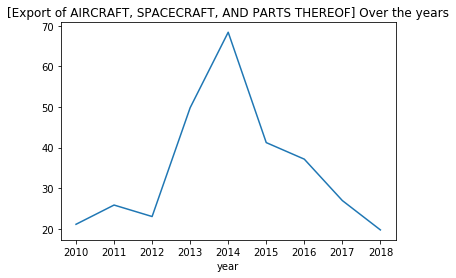

In [66]:
plt.title("[Export of AIRCRAFT, SPACECRAFT, AND PARTS THEREOF] Over the years")
sns.lineplot(x=df_comm.loc["AIRCRAFT, SPACECRAFT, AND PARTS THEREOF."].index , y=df_comm.loc["AIRCRAFT, SPACECRAFT, AND PARTS THEREOF."].values)


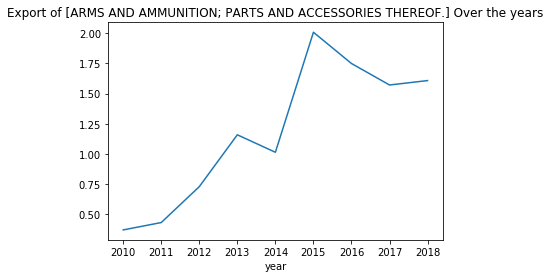

In [68]:
val = "ARMS AND AMMUNITION; PARTS AND ACCESSORIES THEREOF."
plt.title(f"Export of [{val}] Over the years")
sns.lineplot(x=df_comm.loc[val].index , y=df_comm.loc[val].values)


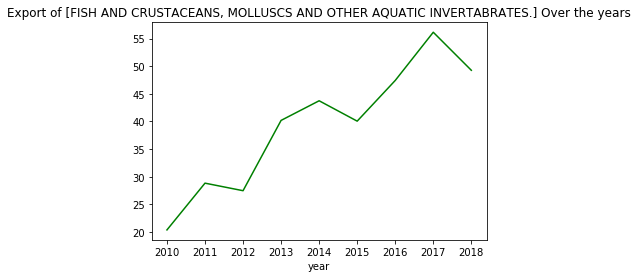

In [71]:
val ="FISH AND CRUSTACEANS, MOLLUSCS AND OTHER AQUATIC INVERTABRATES."
plt.title(f"Export of [{val}] Over the years")
sns.lineplot(x=df_comm.loc[val].index , y=df_comm.loc[val].values , color="green")


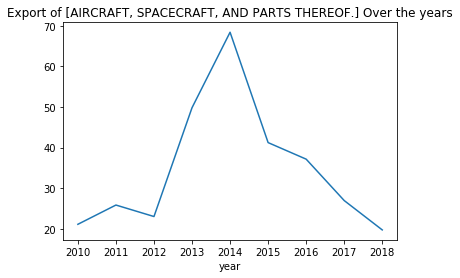

In [78]:
val = "AIRCRAFT, SPACECRAFT, AND PARTS THEREOF."
plt.title(f"Export of [{val}] Over the years")
sns.lineplot(x=df_comm.loc[val].index , y=df_comm.loc[val].values)

# Country wise analysis

In [100]:
df_cntry = df.groupby("country").agg({"value":"sum"})

In [107]:
df_cntry.sort_values(by="value" , ascending=False , inplace=True)

In [108]:
df_cntry.reset_index(inplace=True)

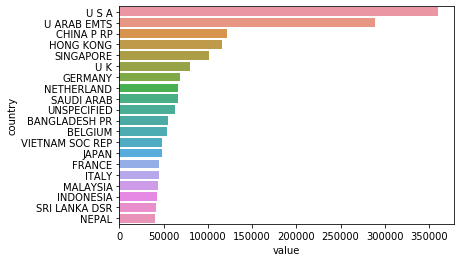

In [110]:

sns.barplot(x="value" , y="country" , data=df_cntry[:20])

In [111]:
df_cntry = pd.pivot_table(df , values="value" , index="country" , columns="year")

In [113]:
df_cntry.sample(n=6)

year,2010,2011,2012,2013,2014,2015,2016,2017,2018
country,,,,,,,,,
U ARAB EMTS,345.123265,366.583980,370.574388,311.429388,337.017653,309.348571,318.113878,287.201735,307.412041
U K,75.099588,87.649388,87.879796,100.812165,96.077113,92.929053,87.038367,100.946042,96.968646
FAROE IS.,0.185000,0.170000,0.483333,0.614000,0.526000,0.437500,0.082857,0.042857,0.592000
MAURITIUS,9.382637,15.388462,14.562889,11.236854,21.453708,9.506889,9.683736,11.706413,12.615000
BRUNEI,0.359531,12.978116,0.563099,0.469855,0.598571,0.423731,0.563553,0.853108,0.769041
MOROCCO,4.031646,4.482169,5.201829,4.701951,3.978415,4.121807,4.346977,4.968161,7.815632
